In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os 

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#where to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print("Saving figure: " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

Saving figure: digit


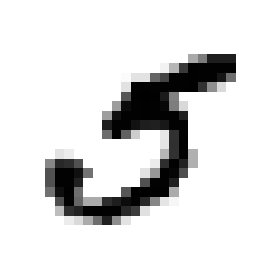

In [7]:
some_digit = X[36000]
some_digit_shape = some_digit.reshape(28,28)
plt.imshow(some_digit_shape, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
save_fig("digit")
plt.show()

In [8]:
y[36000]

5

In [9]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [10]:
def plot_digits(instances, images_per_row=10, **options):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(28,28) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows*images_per_row - len(instances)
    images.append(np.zeros((28,28*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure: more_digits_plot


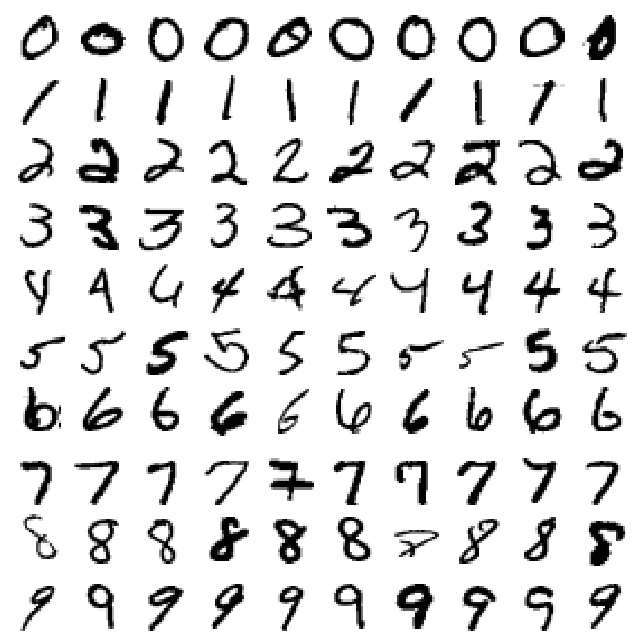

In [11]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classifier

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
np.unique(y_train_5)

array([False,  True])

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96225, 0.9645 , 0.94765])

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53417,  1162],
       [ 1350,  4071]])

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7779476399770686

In [21]:
3996/(3996 + 1463) #TP/TP+FP

0.7320021982047994

In [22]:
recall_score(y_train_5, y_train_pred)

0.7509684560044272

In [23]:
3996/(3996 + 1425) #TP/TP+FN

0.7371333702268954

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7642200112633752

Precision vs Recall using DecisionFunction()

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([150526.40944343])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#threshold=0 is used in predict()

array([ True])

In [27]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions

array([0.09093196, 0.09091672, 0.09091824, ..., 1.        , 1.        ,
       1.        ])

Saving figure: Precision_vs_Recall_plot


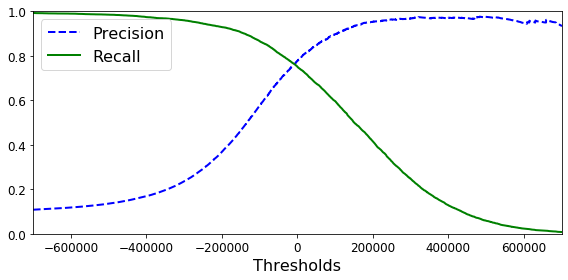

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("Precision_vs_Recall_plot")
plt.show()

In [31]:
#for 90 precision
y_train_pred_90 = (y_scores > 140000)

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.9276553765208813

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.5203836930455635

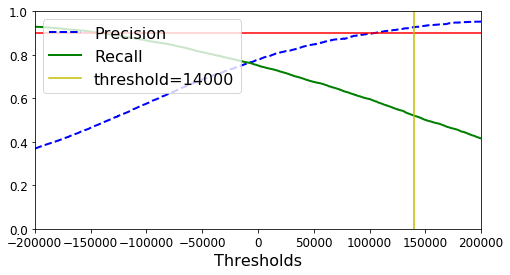

In [34]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axvline(x=140000, color='y', linestyle='-', label="threshold=14000")
plt.legend(loc="upper left", fontsize=16)
plt.xlim([-200000, 200000])
plt.show()

Saving figure: Precision_vs_Recall


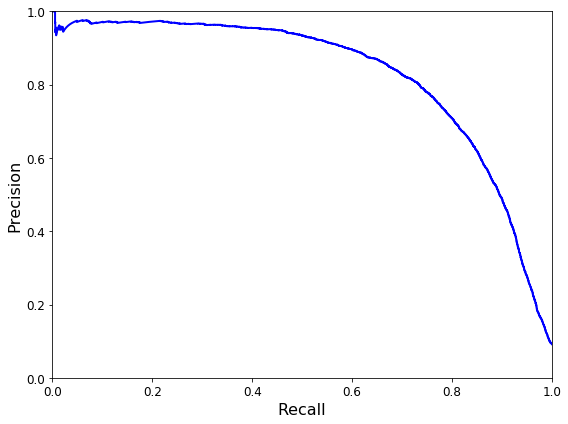

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
save_fig("Precision_vs_Recall")
plt.show()

## Roc curves

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure: roc_curve_plot


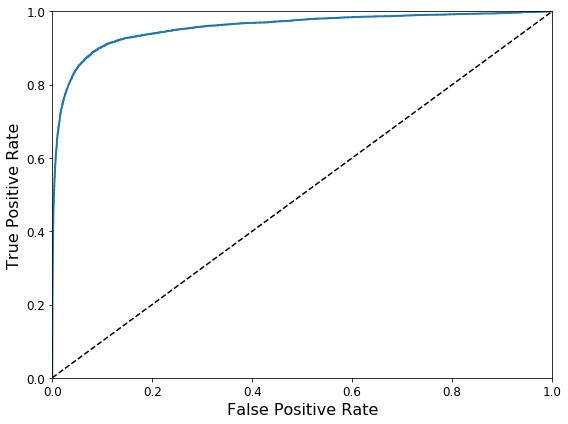

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
save_fig("roc_curve_plot")
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9562435587387078

# Multiclass Classification

In [39]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-152619.46799791, -441052.22074349, -249930.3138537 ,
        -237258.35168498, -447251.81933158,  120565.05820991,
        -834139.15404835, -188142.48490477, -555223.79499145,
        -536978.92518594]])

In [41]:
np.argmax(some_digit_scores)

5

In [42]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [43]:
sgd_clf.classes_[5]

5

In [44]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [45]:
len(ovo_clf.estimators_) #10c2

45

In [46]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8618, 0.8675, 0.8389])

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9091 , 0.90955, 0.9062 ])

## Error analysis

In [48]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
cnf_mtx = confusion_matrix(y_train, y_train_pred)
cnf_mtx

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]])

Saving figure: confusion_matrix_plot


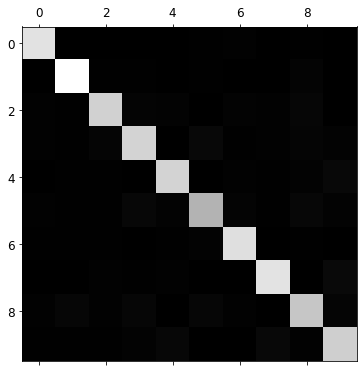

In [49]:
plt.figure(figsize=(6,6))
plt.matshow(cnf_mtx, cmap=plt.cm.gray, fignum=1)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [50]:
row_sums = cnf_mtx.sum(axis=1, keepdims=True)
norm_cnf_mtx = cnf_mtx/row_sums

Saving figure: confusion_matrix_error_plot


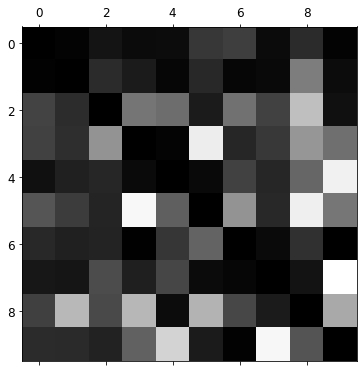

In [51]:
np.fill_diagonal(norm_cnf_mtx, 0)
plt.figure(figsize=(6,6))
plt.matshow(norm_cnf_mtx, cmap=plt.cm.gray, fignum=1)
save_fig("confusion_matrix_error_plot", tight_layout=False)
plt.show()

Saving figure: error_analysis_digits_plot


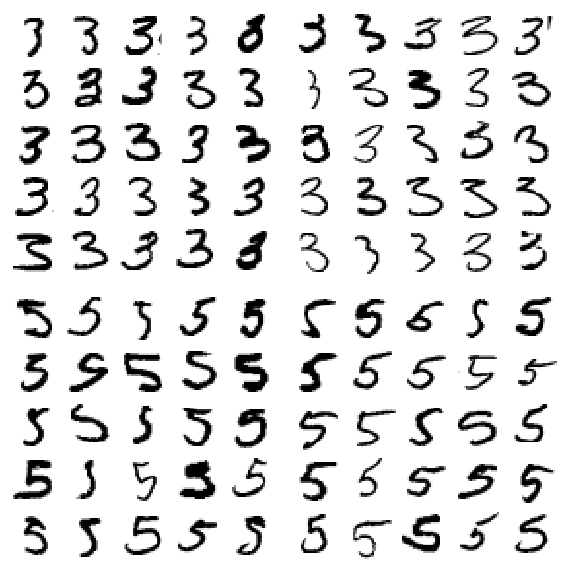

In [52]:
cla_a, cl_b = 3, 5
X_aa = X_train[(y_train == 3) & (y_train_pred == 3)]
X_ab = X_train[(y_train == 3) & (y_train_pred == 5)]
X_ba = X_train[(y_train == 5) & (y_train_pred == 3)]
X_bb = X_train[(y_train == 5) & (y_train_pred == 5)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Multiout Classification

In [55]:
noise = np.random.randint(0,100,(len(X_train), 784)) #draws len(X_train)*784 random output
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod, y_test_mod = X_train, X_test

Saving figure: noisy_digit_example_plot


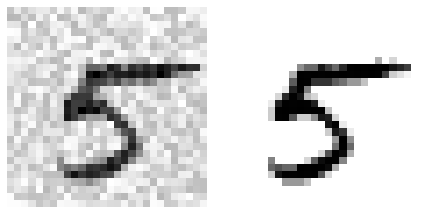

In [56]:
some_ind = 5500
plt.subplot(121); plot_digit(X_test_mod[some_ind])
plt.subplot(122); plot_digit(y_test_mod[some_ind])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure: clean_digit_example_plot


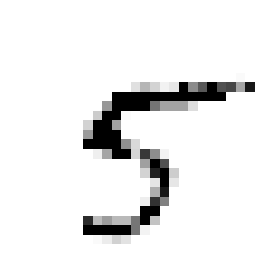

In [58]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_ind]])
plot_digit(clean_digit)
save_fig("clean_digit_example_plot")

# KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [61]:
y_knn_pred = knn_clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

### Data Augumentation

In [63]:
from scipy.ndimage.interpolation import shift

In [66]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape(-1)

Saving figure: Shifted_images


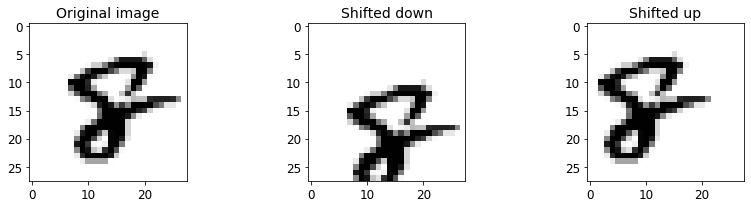

In [67]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original image", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
save_fig("Shifted_images")
plt.show()

In [68]:
X_train_aug = [image for image in X_train]
Y_train_aug = [image for image in y_train]

for dx,dy in ((0,1), (0,-1), (1,0), (-1,0)):
    for image,label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image,dx,dy))
        Y_train_aug.append(label)
        
X_train_aug = np.array(X_train_aug)
Y_train_aug = np.array(Y_train_aug)

In [73]:
shuffle_idx = np.random.permutation(len(X_train_aug))
X_train_aug = X_train_aug[shuffle_idx]
y_train_aug = Y_train_aug[shuffle_idx]

In [74]:
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [75]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

KeyboardInterrupt: 